<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from io import StringIO
from urllib.request import urlretrieve
import pandas as pd
import numpy as np

In [2]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Call the show function to show the result
plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
seattle_str = 'DATE,STATION,NAME,MLY-CLDD-BASE45,MLY-CLDD-BASE50,MLY-CLDD-BASE55,MLY-CLDD-BASE57,MLY-CLDD-BASE60,MLY-CLDD-BASE70,MLY-CLDD-BASE72,MLY-CLDD-NORMAL,MLY-DUTR-NORMAL,MLY-DUTR-STDDEV,MLY-GRDD-BASE40,MLY-GRDD-BASE45,MLY-GRDD-BASE50,MLY-GRDD-BASE55,MLY-GRDD-BASE57,MLY-GRDD-BASE60,MLY-GRDD-BASE65,MLY-GRDD-BASE70,MLY-GRDD-BASE72,MLY-GRDD-TB4886,MLY-GRDD-TB5086,MLY-HTDD-BASE40,MLY-HTDD-BASE45,MLY-HTDD-BASE50,MLY-HTDD-BASE55,MLY-HTDD-BASE57,MLY-HTDD-BASE60,MLY-HTDD-NORMAL,MLY-PRCP-25PCTL,MLY-PRCP-50PCTL,MLY-PRCP-75PCTL,MLY-PRCP-AVGNDS-GE001HI,MLY-PRCP-AVGNDS-GE010HI,MLY-PRCP-AVGNDS-GE050HI,MLY-PRCP-AVGNDS-GE100HI,MLY-PRCP-NORMAL,MLY-SNOW-25PCTL,MLY-SNOW-50PCTL,MLY-SNOW-75PCTL,MLY-SNOW-AVGNDS-GE001TI,MLY-SNOW-AVGNDS-GE010TI,MLY-SNOW-AVGNDS-GE030TI,MLY-SNOW-AVGNDS-GE050TI,MLY-SNOW-AVGNDS-GE100TI,MLY-SNOW-NORMAL,MLY-SNWD-AVGNDS-GE001WI,MLY-SNWD-AVGNDS-GE003WI,MLY-SNWD-AVGNDS-GE005WI,MLY-SNWD-AVGNDS-GE010WI,MLY-TAVG-NORMAL,MLY-TAVG-STDDEV,MLY-TMAX-AVGNDS-GRTH040,MLY-TMAX-AVGNDS-GRTH050,MLY-TMAX-AVGNDS-GRTH060,MLY-TMAX-AVGNDS-GRTH070,MLY-TMAX-AVGNDS-GRTH080,MLY-TMAX-AVGNDS-GRTH090,MLY-TMAX-AVGNDS-GRTH100,MLY-TMAX-AVGNDS-LSTH032,MLY-TMAX-NORMAL,MLY-TMAX-STDDEV,MLY-TMIN-AVGNDS-LSTH000,MLY-TMIN-AVGNDS-LSTH010,MLY-TMIN-AVGNDS-LSTH020,MLY-TMIN-AVGNDS-LSTH032,MLY-TMIN-AVGNDS-LSTH040,MLY-TMIN-AVGNDS-LSTH050,MLY-TMIN-AVGNDS-LSTH060,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV,MONTH\n1,USW00094290,"SEATTLE SAND PT WSFO, WA US",27.0,3.0,-7777.0,-7777.0,0.0,0.0,0.0,0.0,10.2,1.4,104.0,27.0,3.0,-7777.0,-7777.0,0.0,0.0,0.0,0.0,28.0,16.0,39.0,117.0,247.0,400.0,462.0,555.0,710.0,3.29,4.99,6.07,18.5,12.1,3.1,0.7,4.81,0.0,0.0,0.0,0.6,0.3,0.0,0.0,0.0,0.4,0.2,0.0,0.0,0.0,42.1,2.2,279.0,10.1,2.0,0.0,0.0,0.0,0.0,0.3,47.2,2.4,0.0,0.0,1.0,6.4,203.0,309.0,310.0,310.0,37.0,64.0,129.0,317.0,709.0,959.0,1000.0,2.3,Jan\n2,USW00094290,"SEATTLE SAND PT WSFO, WA US",31.0,3.0,-7777.0,-7777.0,0.0,0.0,0.0,0.0,13.1,1.8,116.0,31.0,3.0,-7777.0,-7777.0,0.0,0.0,0.0,0.0,47.0,31.0,19.0,75.0,186.0,323.0,379.0,463.0,603.0,2.09,3.08,4.44,14.1,7.6,1.4,0.1,3.31,0.0,0.0,0.0,0.4,0.2,0.1,0.0,0.0,0.6,0.3,0.1,0.0,0.0,43.4,2.3,269.0,13.3,14.0,0.0,0.0,0.0,0.0,0.0,50.0,2.4,0.0,0.0,1.0,5.0,190.0,280.0,280.0,280.0,36.9,15.0,76.0,273.0,616.0,917.0,1000.0,2.6,Feb\n3,USW00094290,"SEATTLE SAND PT WSFO, WA US",81.0,16.0,2.0,-7777.0,-7777.0,0.0,0.0,0.0,14.5,1.2,207.0,81.0,16.0,2.0,-7777.0,-7777.0,0.0,0.0,0.0,97.0,72.0,4.0,33.0,123.0,263.0,324.0,417.0,572.0,2.6,3.46,3.93,17.1,10.1,1.7,0.4,3.51,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,-7777.0,0.0,0.0,0.0,0.0,46.6,2.0,308.0,23.0,45.0,3.0,0.0,0.0,0.0,0.0,53.8,2.4,0.0,0.0,0.0,1.6,173.0,310.0,310.0,310.0,39.3,0.0,20.0,41.0,152.0,670.0,986.0,1.8,Mar\n4,USW00094290,"SEATTLE SAND PT WSFO, WA US",169.0,58.0,12.0,6.0,1.0,0.0,0.0,-7777.0,16.0,1.7,315.0,169.0,58.0,12.0,6.0,1.0,-7777.0,0.0,0.0,160.0,130.0,-7777.0,4.0,43.0,147.0,200.0,286.0,435.0,2.1,2.68,2.94,15.0,8.2,1.3,0.1,2.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.5,1.6,300.0,28.4,105.0,12.0,1.0,0.0,0.0,0.0,58.5,2.0,0.0,0.0,0.0,-7777.0,80.0,293.0,300.0,300.0,42.5,0.0,0.0,0.0,0.0,114.0,711.0,1.5,Apr\n5,USW00094290,"SEATTLE SAND PT WSFO, WA US",343.0,193.0,78.0,49.0,21.0,-7777.0,-7777.0,3.0,16.5,1.8,497.0,343.0,193.0,78.0,49.0,21.0,3.0,-7777.0,-7777.0,277.0,234.0,0.0,-7777.0,5.0,46.0,78.0,144.0,281.0,1.34,1.95,2.91,12.5,6.5,1.0,0.1,2.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,2.2,310.0,30.9,222.0,63.0,8.0,0.0,0.0,0.0,64.3,2.8,0.0,0.0,0.0,0.0,12.0,214.0,310.0,310.0,47.8,0.0,0.0,0.0,0.0,0.0,58.0,1.9,May\n6,USW00094290,"SEATTLE SAND PT WSFO, WA US",480.0,330.0,184.0,130.0,65.0,2.0,1.0,14.0,17.4,1.8,630.0,480.0,330.0,184.0,130.0,65.0,14.0,2.0,1.0,392.0,336.0,0.0,0.0,-7777.0,4.0,10.0,35.0,134.0,1.04,1.54,2.25,9.9,4.8,0.7,0.1,1.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,1.8,300.0,30.0,284.0,131.0,21.0,-7777.0,0.0,0.0,69.7,2.5,0.0,0.0,0.0,0.0,0.0,74.0,297.0,300.0,52.3,0.0,0.0,0.0,0.0,0.0,0.0,1.2,Jun\n7,USW00094290,"SEATTLE SAND PT WSFO, WA US",648.0,493.0,338.0,276.0,185.0,15.0,8.0,65.0,19.6,2.5,803.0,648.0,493.0,338.0,276.0,185.0,65.0,15.0,8.0,551.0,490.0,0.0,0.0,0.0,-7777.0,-7777.0,2.0,37.0,0.3,0.72,1.1,5.8,2.1,0.2,0.0,0.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.9,1.8,310.0,31.0,309.0,248.0,76.0,0.7,-7777.0,0.0,75.7,2.9,0.0,0.0,0.0,0.0,0.0,3.0,278.0,310.0,56.1,0.0,0.0,0.0,0.0,0.0,0.0,1.2,Jul\n8,USW00094290,"SEATTLE SAND PT WSFO, WA US",668.0,513.0,358.0,296.0,204.0,14.0,6.0,75.0,19.5,1.5,823.0,668.0,513.0,358.0,296.0,204.0,75.0,14.0,6.0,572.0,511.0,0.0,0.0,0.0,-7777.0,-7777.0,1.0,27.0,0.33,0.6,1.24,5.7,3.0,0.6,0.1,0.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.5,1.4,310.0,31.0,310.0,262.0,83.0,0.4,0.0,0.0,76.3,1.8,0.0,0.0,0.0,0.0,0.0,4.0,263.0,310.0,56.8,0.0,0.0,0.0,0.0,0.0,0.0,1.3,Aug\n9,USW00094290,"SEATTLE SAND PT WSFO, WA US",498.0,348.0,202.0,149.0,83.0,2.0,1.0,19.0,18.2,1.9,648.0,498.0,348.0,202.0,149.0,83.0,19.0,2.0,1.0,412.0,358.0,0.0,0.0,-7777.0,4.0,11.0,35.0,121.0,0.64,1.67,2.06,7.8,4.0,0.8,-7777.0,1.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.6,1.7,300.0,30.0,286.0,159.0,27.0,0.1,0.0,0.0,70.7,2.3,0.0,0.0,0.0,0.0,0.0,75.0,296.0,300.0,52.5,0.0,0.0,0.0,0.0,0.0,0.0,1.5,Sep\n10,USW00094290,"SEATTLE SAND PT WSFO, WA US",260.0,123.0,35.0,17.0,4.0,-7777.0,0.0,-7777.0,13.7,1.5,412.0,260.0,123.0,35.0,17.0,4.0,-7777.0,-7777.0,0.0,207.0,167.0,-7777.0,3.0,21.0,88.0,132.0,212.0,363.0,2.03,3.41,4.41,13.2,7.8,2.0,0.3,3.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.3,1.8,310.0,29.7,148.0,17.0,2.0,0.0,0.0,0.0,60.1,2.0,0.0,0.0,0.0,0.1,24.0,236.0,310.0,310.0,46.5,0.0,0.0,0.0,2.0,58.0,349.0,1.8,Oct\n11,USW00094290,"SEATTLE SAND PT WSFO, WA US",78.0,18.0,2.0,1.0,-7777.0,0.0,0.0,0.0,10.4,1.6,195.0,78.0,18.0,2.0,1.0,-7777.0,0.0,0.0,0.0,66.0,43.0,9.0,42.0,132.0,266.0,325.0,414.0,564.0,4.53,5.42,7.17,18.5,12.6,3.8,1.0,5.84,0.0,0.0,0.0,0.1,0.1,0.1,0.0,0.0,0.3,0.2,0.0,0.0,0.0,46.2,2.9,296.0,18.6,12.0,-7777.0,0.0,0.0,0.0,0.1,51.4,2.9,0.0,0.0,1.0,1.9,123.0,285.0,300.0,300.0,41.0,3.0,21.0,75.0,224.0,566.0,960.0,3.0,Nov\n12,USW00094290,"SEATTLE SAND PT WSFO, WA US",18.0,1.0,-7777.0,0.0,0.0,0.0,0.0,0.0,9.6,1.2,84.0,18.0,1.0,-7777.0,0.0,0.0,0.0,0.0,0.0,18.0,9.0,50.0,139.0,277.0,431.0,493.0,586.0,741.0,3.94,5.06,6.97,18.8,11.8,3.2,1.1,5.43,0.0,0.0,2.0,0.9,0.6,0.3,0.2,0.0,2.3,1.6,1.0,0.5,0.0,41.1,2.2,272.0,7.2,-7777.0,0.0,0.0,0.0,0.0,0.6,45.9,2.3,0.0,-7777.0,6.0,6.4,228.0,310.0,310.0,310.0,36.3,84.0,174.0,376.0,729.0,980.0,1000.0,2.3,Dec\n'
seattle_weather = pd.read_csv(StringIO(seattle_str), index_col='DATE')
seattle_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 80 columns):
STATION                    12 non-null object
NAME                       12 non-null object
MLY-CLDD-BASE45            12 non-null float64
MLY-CLDD-BASE50            12 non-null float64
MLY-CLDD-BASE55            12 non-null float64
MLY-CLDD-BASE57            12 non-null float64
MLY-CLDD-BASE60            12 non-null float64
MLY-CLDD-BASE70            12 non-null float64
MLY-CLDD-BASE72            12 non-null float64
MLY-CLDD-NORMAL            12 non-null float64
MLY-DUTR-NORMAL            12 non-null float64
MLY-DUTR-STDDEV            12 non-null float64
MLY-GRDD-BASE40            12 non-null float64
MLY-GRDD-BASE45            12 non-null float64
MLY-GRDD-BASE50            12 non-null float64
MLY-GRDD-BASE55            12 non-null float64
MLY-GRDD-BASE57            12 non-null float64
MLY-GRDD-BASE60            12 non-null float64
MLY-GRDD-BASE65            12 non-null float64
MLY-GR

In [4]:
austin_str = 'DATE,STATION,NAME,MLY-CLDD-BASE45,MLY-CLDD-BASE50,MLY-CLDD-BASE55,MLY-CLDD-BASE57,MLY-CLDD-BASE60,MLY-CLDD-BASE70,MLY-CLDD-BASE72,MLY-CLDD-NORMAL,MLY-DUTR-NORMAL,MLY-DUTR-STDDEV,MLY-GRDD-BASE40,MLY-GRDD-BASE45,MLY-GRDD-BASE50,MLY-GRDD-BASE55,MLY-GRDD-BASE57,MLY-GRDD-BASE60,MLY-GRDD-BASE65,MLY-GRDD-BASE70,MLY-GRDD-BASE72,MLY-GRDD-TB4886,MLY-GRDD-TB5086,MLY-HTDD-BASE40,MLY-HTDD-BASE45,MLY-HTDD-BASE50,MLY-HTDD-BASE55,MLY-HTDD-BASE57,MLY-HTDD-BASE60,MLY-HTDD-NORMAL,MLY-PRCP-25PCTL,MLY-PRCP-50PCTL,MLY-PRCP-75PCTL,MLY-PRCP-AVGNDS-GE001HI,MLY-PRCP-AVGNDS-GE010HI,MLY-PRCP-AVGNDS-GE050HI,MLY-PRCP-AVGNDS-GE100HI,MLY-PRCP-NORMAL,MLY-TAVG-NORMAL,MLY-TAVG-STDDEV,MLY-TMAX-AVGNDS-GRTH040,MLY-TMAX-AVGNDS-GRTH050,MLY-TMAX-AVGNDS-GRTH060,MLY-TMAX-AVGNDS-GRTH070,MLY-TMAX-AVGNDS-GRTH080,MLY-TMAX-AVGNDS-GRTH090,MLY-TMAX-AVGNDS-GRTH100,MLY-TMAX-AVGNDS-LSTH032,MLY-TMAX-NORMAL,MLY-TMAX-STDDEV,MLY-TMIN-AVGNDS-LSTH000,MLY-TMIN-AVGNDS-LSTH010,MLY-TMIN-AVGNDS-LSTH020,MLY-TMIN-AVGNDS-LSTH032,MLY-TMIN-AVGNDS-LSTH040,MLY-TMIN-AVGNDS-LSTH050,MLY-TMIN-AVGNDS-LSTH060,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV,MONTH\n1,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",190,103,50,35,18,1,-7777,5,25.8,3.9,308,190,103,50,35,18,5,1,-7777,244,214,22,59,128,229,277,353,495,0.83,1.48,2.76,7.2,3.9,1.2,0.8,2.2,49.2,3.0,299,25.8,185,90,8,0.0,0.0,0.1,62.1,4.1,0.0,1,15,11.9,203,275,302,310,36.3,298,570,839,967,997,1000,2.9,Jan\n2,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",228,132,68,49,29,3,1,11,25.3,3.8,349,228,132,68,49,29,11,3,1,262,231,10,29,73,148,186,250,373,1.0,2.0,3.23,6.9,3.2,1.2,0.3,2.31,52.1,3.4,273,25.3,195,99,17,0.1,0.0,0.1,64.8,4.6,0.0,0,4,7.9,152,239,264,280,39.4,103,327,614,867,973,999,3.2,Feb\n3,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",446,306,185,146,98,13,6,42,25.2,2.7,596,446,306,185,146,98,42,13,6,428,385,1,6,21,55,77,123,222,1.68,2.61,3.82,9.7,4.5,1.9,0.9,2.78,59.2,3.1,310,30.5,275,194,56,0.2,0.0,0.0,71.8,3.1,0.0,0,1,2.2,96,198,270,308,46.6,10,73,242,494,761,928,3.6,Mar\n4,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",668,519,373,318,240,53,32,130,25.1,4.0,817,668,519,373,318,240,130,53,32,594,543,-7777,-7777,2,6,10,22,63,0.91,1.68,3.04,6.5,3.9,1.2,0.3,2.27,67.3,2.9,300,29.9,296,277,167,1.3,0.2,0.0,79.8,2.8,0.0,0,0,0.2,26,99,193,287,54.7,0,0,0,48,189,453,4.1,Apr\n5,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",936,781,626,564,471,181,134,319,23.0,2.3,1091,936,781,626,564,471,319,181,134,804,744,0,0,0,-7777,-7777,-7777,3,1.73,3.85,6.12,6.2,3.9,1.8,1.0,4.05,75.2,2.4,310,31.0,310,309,273,9.3,0.0,0.0,86.7,2.8,0.0,0,0,0.0,1,15,89,250,63.7,0,0,0,0,0,0,2.5,May\n6,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",1081,931,781,721,631,331,272,481,22.3,2.8,1231,1081,931,781,721,631,481,331,272,894,834,0,0,0,0,0,0,-7777,2.28,3.68,6.65,6.6,4.7,2.7,1.2,4.63,81.0,2.2,300,30.0,300,300,297,20.6,1.4,0.0,92.2,3.2,0.0,0,0,0.0,0,0,5,158,69.9,0,0,0,0,0,0,1.9,Jun\n7,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",1192,1037,882,820,727,417,355,572,23.5,3.1,1347,1192,1037,882,820,727,572,417,355,955,893,0,0,0,0,0,0,0,0.97,2.21,3.2,6.9,4.8,1.7,0.8,2.44,83.4,1.9,310,31.0,310,310,308,26.7,5.6,0.0,95.2,3.2,0.0,0,0,0.0,0,0,0,83,71.7,0,0,0,0,0,0,1.3,Jul\n8,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",1199,1044,889,827,735,425,363,580,24.9,1.8,1354,1199,1044,889,827,735,580,425,363,948,886,0,0,0,0,0,0,0,0.74,1.74,2.58,5.6,3.4,1.5,0.5,2.03,83.7,1.6,310,31.0,310,310,307,28.9,4.9,0.0,96.1,2.3,0.0,0,0,0.0,0,0,2,92,71.3,0,0,0,0,0,0,1.4,Aug\n9,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",985,835,685,625,536,246,193,388,25.1,3.2,1136,985,835,685,625,536,388,246,193,813,754,0,0,-7777,-7777,-7777,-7777,2,0.77,1.95,4.06,5.8,4.0,1.5,0.9,2.54,77.8,2.0,300,30.0,300,298,278,16.8,1.3,0.0,90.4,2.6,0.0,0,0,0.0,0,11,57,226,65.3,0,0,0,0,0,0,2.5,Sep\n10,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",745,591,438,379,295,83,56,175,26.4,4.8,901,745,591,438,379,295,175,83,56,649,595,0,-7777,-7777,3,5,15,49,1.57,3.15,6.5,7.1,4.8,2.2,1.4,4.24,69.0,1.9,310,31.0,308,286,202,5.3,0.0,0.0,82.2,2.3,0.0,0,0,0.0,16,96,199,284,55.9,0,0,3,25,96,264,3.7,Oct\n11,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",412,281,172,136,91,12,7,38,25.8,3.3,555,412,281,172,136,91,38,12,7,403,362,1,8,28,68,92,137,234,1.04,2.56,3.78,7.1,3.6,1.6,0.7,2.94,58.4,2.9,299,29.2,258,180,65,0.1,0.0,0.0,71.4,3.7,0.0,0,1,3.2,102,198,269,297,45.5,2,46,216,530,819,969,2.9,Nov\n12,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",208,119,63,47,29,2,1,10,26.4,3.6,335,208,119,63,47,29,10,2,1,268,234,13,40,106,205,251,326,462,0.51,0.91,2.96,6.6,3.2,1.4,0.4,2.21,50.4,3.5,304,28.5,194,96,16,0.0,0.0,0.0,63.6,3.8,0.0,0,1,11.5,206,271,300,309,37.2,246,499,777,941,991,999,4.0,Dec\n'
austin_weather = pd.read_csv(StringIO(austin_str), index_col='DATE')
austin_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 67 columns):
STATION                    12 non-null object
NAME                       12 non-null object
MLY-CLDD-BASE45            12 non-null int64
MLY-CLDD-BASE50            12 non-null int64
MLY-CLDD-BASE55            12 non-null int64
MLY-CLDD-BASE57            12 non-null int64
MLY-CLDD-BASE60            12 non-null int64
MLY-CLDD-BASE70            12 non-null int64
MLY-CLDD-BASE72            12 non-null int64
MLY-CLDD-NORMAL            12 non-null int64
MLY-DUTR-NORMAL            12 non-null float64
MLY-DUTR-STDDEV            12 non-null float64
MLY-GRDD-BASE40            12 non-null int64
MLY-GRDD-BASE45            12 non-null int64
MLY-GRDD-BASE50            12 non-null int64
MLY-GRDD-BASE55            12 non-null int64
MLY-GRDD-BASE57            12 non-null int64
MLY-GRDD-BASE60            12 non-null int64
MLY-GRDD-BASE65            12 non-null int64
MLY-GRDD-BASE70            12 non-nu

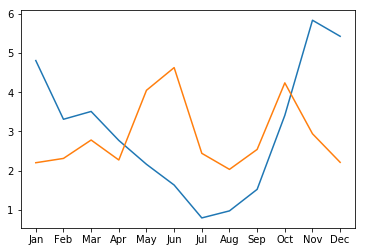

In [5]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot MLY-PRCP-NORMAL from seattle_weather against the MONTH
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"])

# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])

# Call the show function
plt.show()

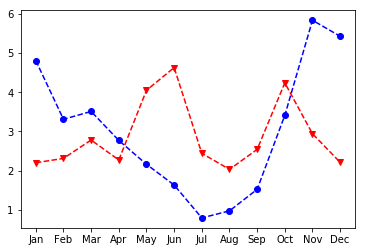

In [6]:
fig, ax = plt.subplots()

# Plot Seattle data, setting data appearance
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"],
        color='b', marker='o', linestyle='--')

# Plot Austin data, setting data appearance
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"],
        color='r', marker='v', linestyle='--')

# Call show to display the resulting plot
plt.show()

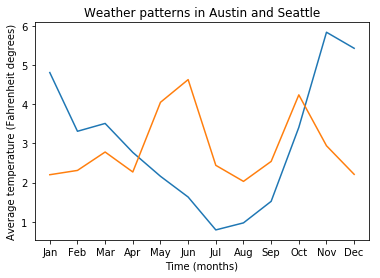

In [7]:
fig, ax = plt.subplots()

ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"])
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])

# Customize the x-axis label
ax.set_xlabel("Time (months)")

# Customize the y-axis label
ax.set_ylabel("Average temperature (Fahrenheit degrees)")

# Add the title
ax.set_title("Weather patterns in Austin and Seattle")

# Display the figure
plt.show()

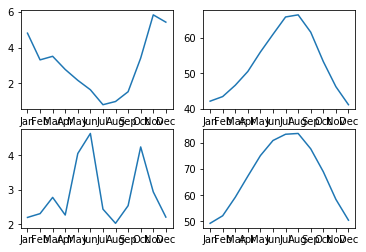

In [9]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2)

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1, 0].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1, 1].plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])
plt.show()

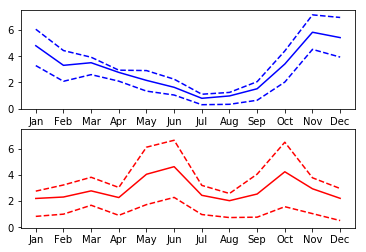

In [12]:
# Create a figure and an array of axes: 2 rows, 1 column with shared y axis
fig, axes = plt.subplots(2, 1, sharey=True)

# Plot Seattle precipitation data in the top axes
axes[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color = 'b')
axes[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-25PCTL"], color = 'b', linestyle = '--')
axes[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-75PCTL"], color = 'b', linestyle = '--')

# Plot Austin precipitation data in the bottom axes
axes[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color = 'r')
axes[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-25PCTL"], color = 'r', linestyle = '--')
axes[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-75PCTL"], color = 'r', linestyle = '--')

plt.show()